In [13]:
import os
import pandas as pd
import numpy as np

# Define the directory where your Excel files are located
directory = r'C:\Users\ahsani2\Documents\Week 15+16\ML Datasets (only days with full-day yield)'

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.xlsx') or filename.endswith('.xls'):  # Filter only Excel files
        filepath = os.path.join(directory, filename)
        
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(filepath)
        
        df['time_diff(min)'] = df['UNIXTIME'].diff() / 60.
        df['stepcount_diff'] = df['RAW STEP COUNT'].diff()
        df['seq_diff'] = df['SEQ NO.'].diff()

        #add a new column of STATE. write Mobile when step count is changed. else, write static
        df['STATE'] = np.where(df['stepcount_diff'] > 0, 'MOBILE', 'STATIC')

        #mobility instances are separated when there is an increase in stepcount and time difference is greater than 2min
        df['Mobility Instance Count'] = ((df['time_diff(min)'] >= 2) & (df['stepcount_diff'] > 0)).cumsum()
        
        df['GroupsforCalculation'] = (((df['time_diff(min)'] >= 2) & (df['stepcount_diff'] > 0)) | (df['seq_diff'] <=0)).cumsum()
        
        # After processing, if you want to save the DataFrame back to Excel
        # Uncomment the line below and specify the desired output file path
        df.to_excel(r'C:\Users\ahsani2\Documents\Week 15+16\ML Datasets (only days with full-day yield)\withMobilityInstance\new' + filename, index=False)  # Modify the output directory as needed

In [14]:
import os
import pandas as pd
import re


# Define the directory where your Excel files are located
directory3 = r'C:\Users\ahsani2\Documents\Week 15+16\ML Datasets (only days with full-day yield)\withMobilityInstance'

# Initialize an empty list to store results from all files
all_results3 = []

# Loop through each file in the directory
for filename3 in os.listdir(directory3):
    if filename3.endswith('.xlsx') or filename3.endswith('.xls'):  # Filter only Excel files
        filepath3 = os.path.join(directory3, filename3)
        
        # Read the Excel file into a pandas DataFrame
        df3 = pd.read_excel(filepath3)
        
        # Initialize variables to store results
        results3 = {
             'ML ID': [],  # Change column heading to 'ML ID'
             'activity_instance': [],
             'duration': [],
             'step_count_diff': []
        }
        
        # Extract the integer/number part from the filename
        ml_id = re.search(r'\d+', filename3).group()
        
        # Iterate over each activity_instance group
        for _, group in df3.groupby('GroupsforCalculation'):
             # Filter rows where state is 'mobile'
             mobile_rows = group[group['STATE'] == 'MOBILE']
             
             # Calculate duration and step_count_diff
             if len(mobile_rows) >= 2:
                  duration = (mobile_rows['UNIXTIME'].max() - mobile_rows['UNIXTIME'].min())/60
                  
                  # Filter out rows with duration outliers
                  if duration < 360:  # As values are recorded after 6hrs even when there is no activityz, 6hrs=360min
                      step_count_diff = mobile_rows['RAW STEP COUNT'].max() - mobile_rows['RAW STEP COUNT'].min()
                      
                      # Append results to dictionary
                      results3['ML ID'].append(ml_id)  # Add extracted number from filename as 'ML ID'
                      results3['activity_instance'].append(group['GroupsforCalculation'].iloc[0])
                      results3['duration'].append(duration)
                      results3['step_count_diff'].append(step_count_diff)
        
        # Append results to the list
        all_results3.append(pd.DataFrame(results3))

# Concatenate results from all files into one DataFrame
final_results_df3 = pd.concat(all_results3, ignore_index=True)

# Specify the output file path for the final Excel file
output_filepath3 = r'C:\Users\ahsani2\Documents\Week 15+16\ML Datasets (only days with full-day yield)\Duration+steps\Duration&Steps.xlsx'

# Save the final DataFrame to Excel
final_results_df3.to_excel(output_filepath3, index=False)


In [15]:
# Read the Excel file into a DataFrame
final_results_df4 = pd.read_excel(r'C:\Users\ahsani2\Documents\Week 15+16\ML Datasets (only days with full-day yield)\Duration+steps\Duration&Steps(sorted).xlsx')

In [16]:

# Calculate median, maximum, and minimum values for each 'ML ID'
statistics = final_results_df4.groupby('ML ID')['step_count_diff'].agg(['median', 'max', 'min'])

# Rename columns for clarity
statistics.columns = ['Median Step Count', 'Maximum Step Count', 'Minimum Step Count']

# Display the statistics table
print(statistics)

# Export the statistics table to an Excel file
statistics.to_excel(r"C:\Users\ahsani2\Documents\02- Mobile Lanterns\stepcount_statistics.xlsx", index=True)

       Median Step Count  Maximum Step Count  Minimum Step Count
ML ID                                                           
1                   21.0                 116                   8
2                   13.0                  31                   8
3                    9.0                  13                   5
4                   12.0                  25                   1
5                   19.0                 191                   5
6                    2.0                   2                   2
7                    9.0                  23                   1
8                    1.0                   1                   1
9                  166.0                 227                  17
10                  15.0                  43                   8
12                  20.0                  20                  20
13                  13.0                  29                   4
14                   6.0                  25                   1
18                  35.0 

Text(0.5, 1.0, 'Number of Steps per Mobility Instance for Individual Mobile Lanterns')

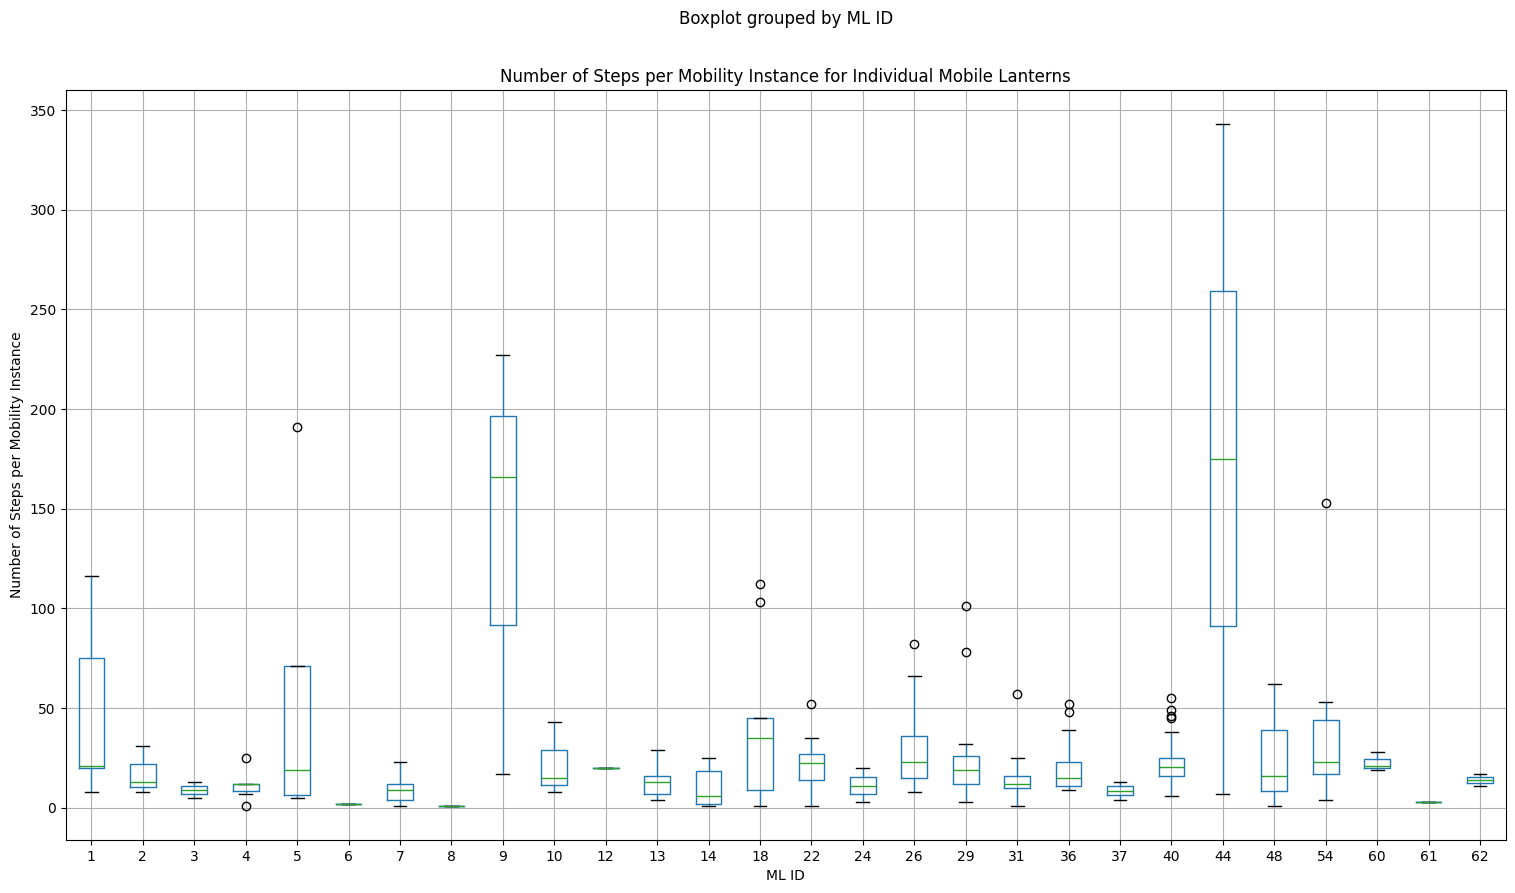

In [17]:
#boxplot
boxplot1 = final_results_df4.boxplot(column='step_count_diff', by = 'ML ID', figsize=(18,10))
boxplot1.set_ylabel("Number of Steps per Mobility Instance")
boxplot1.set_title("Number of Steps per Mobility Instance for Individual Mobile Lanterns")

The median value of step count is 17.0


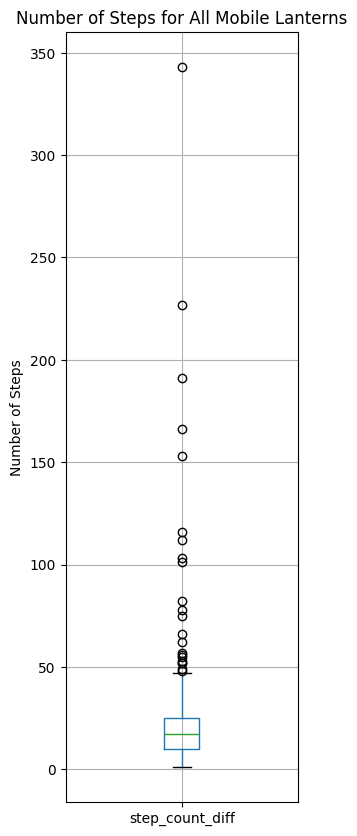

In [18]:
#boxplot
boxplot2 = final_results_df4.boxplot(column='step_count_diff', figsize=(3,10))
boxplot2.set_ylabel("Number of Steps")
boxplot2.set_title("Number of Steps for All Mobile Lanterns")

stepcount = final_results_df4["step_count_diff"]
xmedian = np.median(stepcount)
print("The median value of step count is", xmedian)

C:\Users\ahsani2\AppData\Local\Temp\ipykernel_19344\1866296880.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  k = sns.kdeplot(x=stepcount, shade=True)


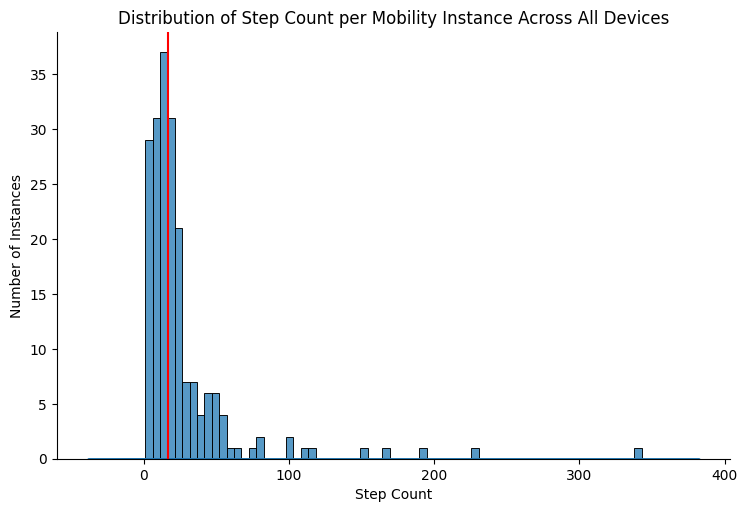

The median value of step count is 17.0


In [19]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.displot(final_results_df4, x="step_count_diff", height=5 ,aspect=1.5).set(title='Distribution of Step Count per Mobility Instance Across All Devices').set_xlabels('Step Count').set_ylabels('Number of Instances')
stepcount = final_results_df4["step_count_diff"]
xmedian = np.median(stepcount)
k = sns.kdeplot(x=stepcount, shade=True)
plt.axvline(xmedian, c='red')

plt.show()
print("The median value of step count is", xmedian)

In [20]:

# Calculate median, maximum, and minimum values for each 'ML ID'
statistics2 = final_results_df4.groupby('ML ID')['duration'].agg(['median', 'max', 'min'])

# Rename columns for clarity
statistics2.columns = ['Median Duration', 'Maximum Duration', 'Minimum Duration']

# Display the statistics table
print(statistics2)

# Export the statistics table to an Excel file
statistics2.to_excel(r"C:\Users\ahsani2\Documents\02- Mobile Lanterns\duration_statistics.xlsx", index=True)

       Median Duration  Maximum Duration  Minimum Duration
ML ID                                                     
1             0.700000          3.266667          0.666667
2             4.783333          5.783333          1.233333
3             1.675000          1.916667          1.433333
4             4.233333         11.016667          2.166667
5             1.866667          6.533333          0.533333
6             0.550000          0.550000          0.550000
7             0.900000          2.150000          0.683333
8             6.166667          6.166667          6.166667
9             4.166667         12.416667          0.683333
10            1.000000          2.333333          0.683333
12            0.883333          0.883333          0.883333
13            0.833333          2.850000          0.500000
14            1.691667          2.300000          0.516667
18            1.550000          6.016667          0.683333
22            1.200000          3.200000          0.5166

Text(0.5, 1.0, 'Duration of Movement per Mobility Instance for Individual Mobile Lanterns')

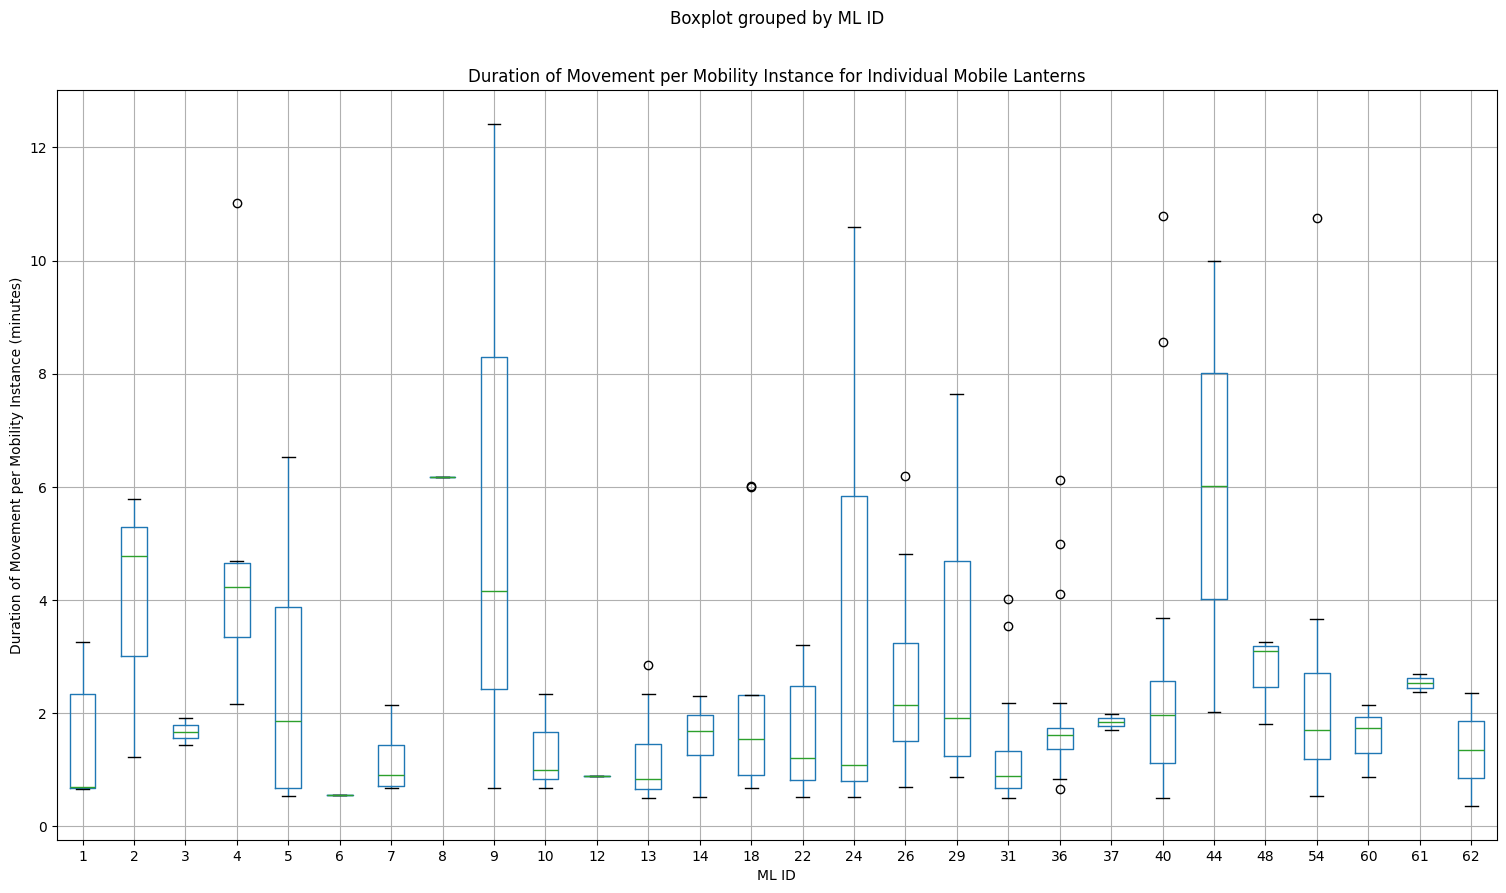

In [21]:
#boxplot
boxplot1 = final_results_df4.boxplot(column='duration', by = 'ML ID', figsize=(18,10))
boxplot1.set_ylabel("Duration of Movement per Mobility Instance (minutes)")
boxplot1.set_title("Duration of Movement per Mobility Instance for Individual Mobile Lanterns")

The median value of duration of movement per mobility instance is 1.716666666666667 minutes.


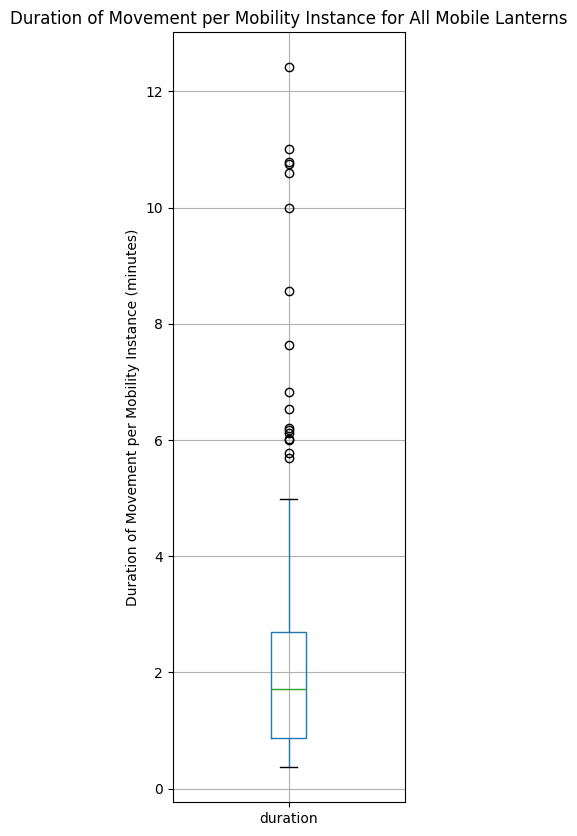

In [22]:
#boxplot
boxplot2 = final_results_df4.boxplot(column='duration', figsize=(3,10))
boxplot2.set_ylabel("Duration of Movement per Mobility Instance (minutes)")
boxplot2.set_title("Duration of Movement per Mobility Instance for All Mobile Lanterns")

duration = final_results_df4["duration"]
xmedian = np.median(duration)
print("The median value of duration of movement per mobility instance is", xmedian, "minutes.")

The median value of duration of movement per mobility instance is 1.6083333333333334 minutes.


C:\Users\ahsani2\AppData\Local\Temp\ipykernel_19344\2448455573.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  k = sns.kdeplot(x=duration, shade=True)


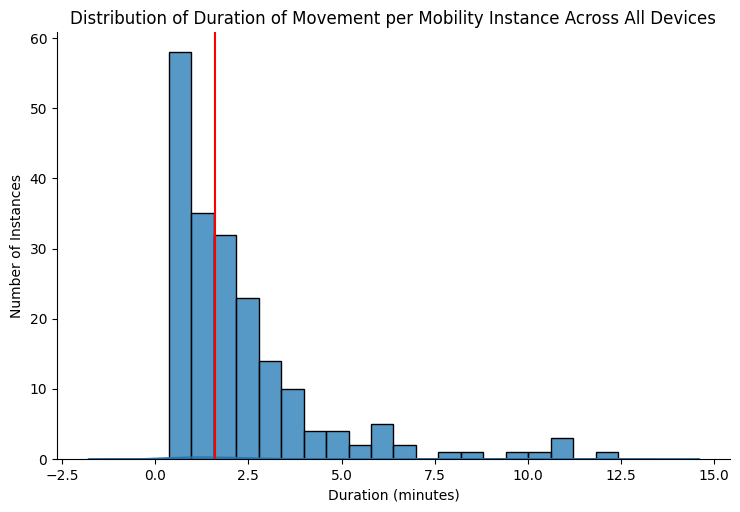

In [23]:
sns.displot(final_results_df4, x="duration", height=5 ,aspect=1.5).set(title='Distribution of Duration of Movement per Mobility Instance Across All Devices').set_xlabels('Duration (minutes)').set_ylabels('Number of Instances')

duration = final_results_df3["duration"]
xmedian = np.median(duration)
print("The median value of duration of movement per mobility instance is", xmedian, "minutes.")

k = sns.kdeplot(x=duration, shade=True)
plt.axvline(xmedian, c='red')

plt.show()

In [26]:
import os
import pandas as pd

# Define the directory where your Excel files are located
directory = r'C:\Users\ahsani2\Documents\Week 15+16\ML Datasets (only days with full-day yield)\withMobilityInstance'

# Initialize an empty list to store results from all files
all_results = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.xlsx') or filename.endswith('.xls'):  # Filter only Excel files
        filepath = os.path.join(directory, filename)
        
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(filepath)
        
        # Extract 'ID' and 'Mobility Instance Count' columns
        if 'ID' in df.columns and 'Mobility Instance Count' in df.columns:
            # Extract 'ID' and corresponding maximum 'Mobility Instance Count'
            max_mobility_instance_count = df.groupby('ID')['Mobility Instance Count'].max()
            
            # Calculate the number of unique dates in the 'timestamp' column
            num_unique_dates = df['datetime'].dt.date.nunique()
            
            # Create DataFrame for this file
            file_results_df = pd.DataFrame({'Mobile Lantern ID': max_mobility_instance_count.index,
                                            'Number of Mobility Instances': max_mobility_instance_count.values,
                                            'Number of Full Days Data Collection': num_unique_dates})
            
            # Append the DataFrame to the list
            all_results.append(file_results_df)

# Concatenate results from all files into one DataFrame
final_results_df = pd.concat(all_results, ignore_index=True)

# Save the final DataFrame to Excel
output_filepath = r'C:\Users\ahsani2\Documents\Week 15+16\ML Datasets (only days with full-day yield)\List of Mobility Instances\MobilityInstanceSummarynew.xlsx'
final_results_df.to_excel(output_filepath, index=False)


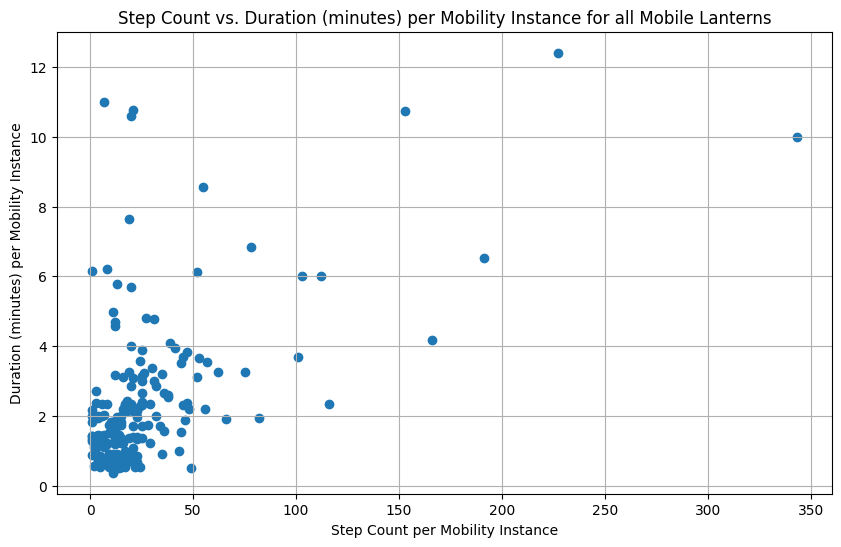

In [27]:


# Extracting data for x and y axes
x = final_results_df4['step_count_diff']
y = final_results_df4['duration']

# Create scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(x, y, alpha=1)  # Adjust the alpha value for transparency if needed

# Adding title and labels
plt.title('Step Count vs. Duration (minutes) per Mobility Instance for all Mobile Lanterns')
plt.xlabel('Step Count per Mobility Instance')
plt.ylabel('Duration (minutes) per Mobility Instance')

# Show plot
plt.grid(True)
plt.show()
